In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Train data 분포 시각화

In [8]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/Colab Notebooks/프로그래머스/3차프로젝트/yolov5/Cigarette-Vape-Detection-14/train_annotations.csv'

# CSV 파일 읽기
annotations_df = pd.read_csv(file_path)

# 데이터 프레임 확인
annotations_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,-_118_jpg.rf.18f5f1f43ec3d2d7a441e1e2eef23c56.jpg,640,640,vape,212,227,456,444
1,electronic-cigarette218_jpg.rf.19242d3e62c72f1...,640,640,vape,228,269,358,457
2,116_jpg.rf.18ea619b6c32d6e94f34407d9ea36126.jpg,640,640,vape,197,140,363,418
3,1fb5434575cbaefcc76e02ef745230af-jpg_720x720q8...,640,640,vape,121,324,186,553
4,1fb5434575cbaefcc76e02ef745230af-jpg_720x720q8...,640,640,vape,238,324,304,554


In [9]:
# 클래스별 객체 수 집계
class_counts = annotations_df['class'].value_counts()
print(class_counts)

class
vape         9051
cigarette    7077
Name: count, dtype: int64


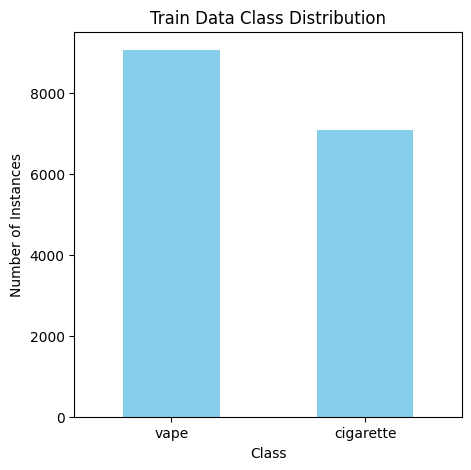

In [10]:
import matplotlib.pyplot as plt

# 클래스별 객체 수 시각화
def plot_class_distribution(class_counts):
    plt.figure(figsize=(5, 5))
    class_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Class')
    plt.xticks(rotation=0)
    plt.ylabel('Number of Instances')
    plt.title('Train Data Class Distribution')
    plt.show()

# 클래스별 객체 수 시각화
plot_class_distribution(class_counts)

In [33]:
# 그룹별로 묶어서 vape와 cigarette의 개수 세기
grouped = annotations_df.groupby('filename')['class'].value_counts().unstack(fill_value=0)
grouped.columns = ['ciga_count', 'vape_count']
grouped = grouped.reset_index()
grouped.head()

,filename,ciga_count,vape_count
0,-10_jpg.rf.903489b1dbd30626717d7bca8f3c3eda.jpg,0,1
1,-110_jpg.rf.3a6d7f56e052ed013fdca10a27cfd2ab.jpg,0,1
2,-140_jpg.rf.dbaf5b32abef31b27892e24608f12995.jpg,0,1
3,-143_jpg.rf.7db0b8f5fa99cfdee2b58e48d4cc9f26.jpg,0,1
4,-207_jpg.rf.01d28efca9b68f90bfc0302811cc3844.jpg,0,1


In [12]:
# 클래스 조합별 개수 집계
grouped['class_combination'] = grouped.apply(lambda row: f"{row['ciga_count']}-{row['vape_count']}", axis=1)
class_combination_counts = grouped['class_combination'].value_counts().sort_index()

# 데이터프레임으로 변환
class_combination_counts_df = class_combination_counts.reset_index()
class_combination_counts_df.columns = ['Class Combination', 'Count']
class_combination_counts_df.sort_values(by='Count',ascending=False, inplace=True)
class_combination_counts_df

,Class Combination,Count
17,1-0,6141
0,0-1,4656
7,0-2,393
25,2-0,168
11,0-4,129
10,0-3,108
12,0-5,102
13,0-6,84
14,0-7,45
29,3-0,42


<Axes: xlabel='Class Combination'>

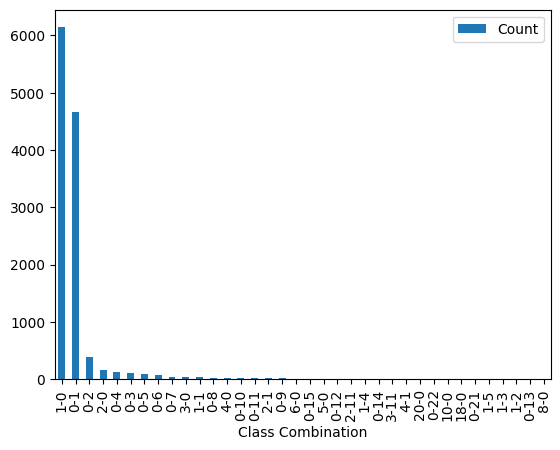

In [13]:
class_combination_counts_df.plot(x='Class Combination', y = 'Count', kind='bar')

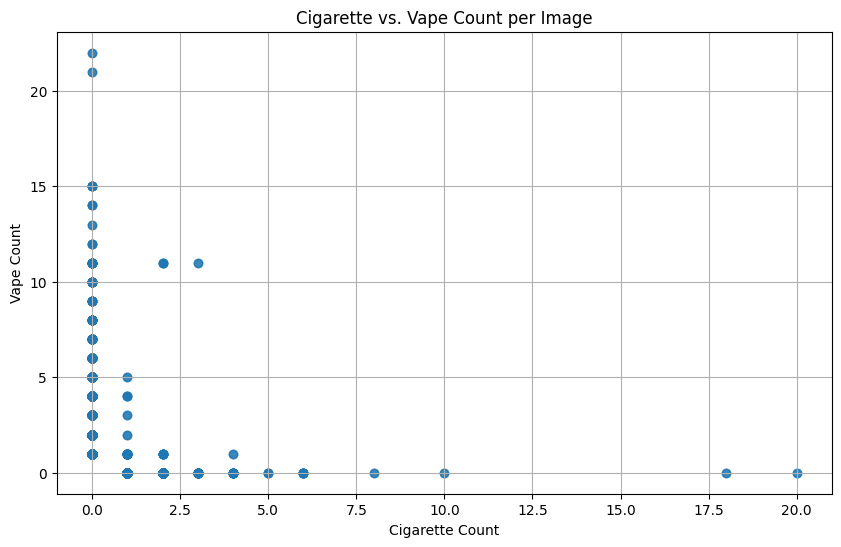

In [14]:
import matplotlib.pyplot as plt

# 시각화 함수 정의
def plot_ciga_vape_counts(grouped_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(grouped_df['ciga_count'], grouped_df['vape_count'], alpha=0.5)
    plt.xlabel('Cigarette Count')
    plt.ylabel('Vape Count')
    plt.title('Cigarette vs. Vape Count per Image')
    plt.grid(True)
    plt.show()

# 시각화 실행
plot_ciga_vape_counts(grouped)


<ipython-input-15-c70727abfd1c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_combination_counts_df, x='Class Combination', y='Count', palette='viridis')


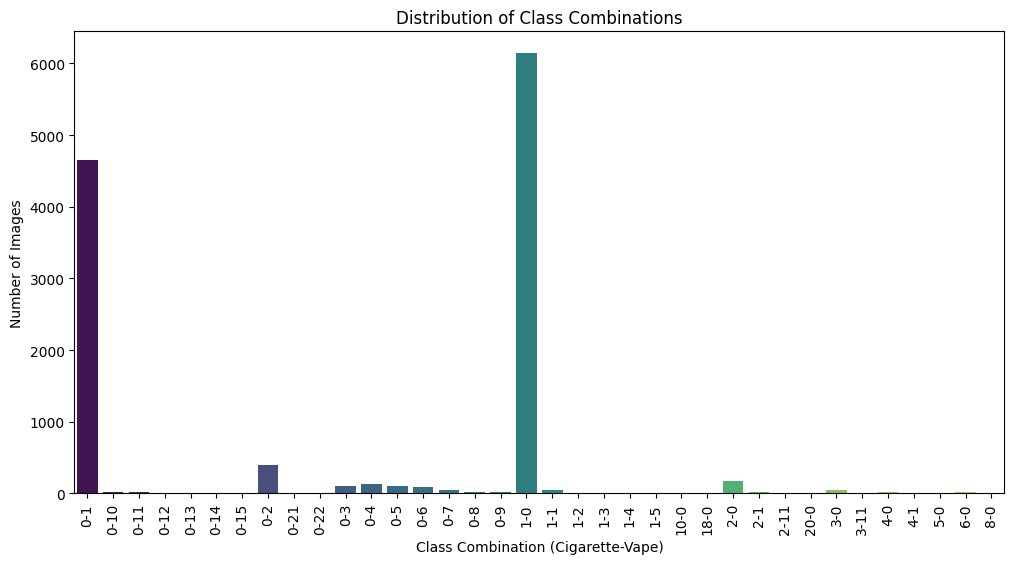

In [15]:
import seaborn as sns

# 두 클래스의 count를 함께 보는 시각화
def plot_class_combinations_distribution(grouped_df):
    # 클래스 조합별 개수 집계
    grouped_df['class_combination'] = grouped_df.apply(lambda row: f"{row['ciga_count']}-{row['vape_count']}", axis=1)
    class_combination_counts = grouped_df['class_combination'].value_counts().sort_index()

    # 데이터 준비
    class_combination_counts_df = class_combination_counts.reset_index()
    class_combination_counts_df.columns = ['Class Combination', 'Count']

    # 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(data=class_combination_counts_df, x='Class Combination', y='Count', palette='viridis')
    plt.xlabel('Class Combination (Cigarette-Vape)')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Class Combinations')
    plt.xticks(rotation=90)
    plt.show()

# 시각화 실행
plot_class_combinations_distribution(grouped)


# Test - ciga 7 vape 55개 있는 이미지 존재

In [16]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/Colab Notebooks/프로그래머스/3차프로젝트/yolov5/Cigarette-Vape-Detection-14/test_annotations.csv'

# CSV 파일 읽기
annotations_df = pd.read_csv(file_path)

# 데이터 프레임 확인
annotations_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,Screenshot-2024-04-04-135859_jpg.rf.0121e98d0e...,640,640,vape,129,348,163,423
1,Screenshot-2024-04-04-135859_jpg.rf.0121e98d0e...,640,640,vape,446,309,500,361
2,a-611-_jpg.rf.070865df5f2f7273d028d04704d46dbb...,640,640,cigarette,248,265,278,332
3,Screenshot-2024-04-04-125918_jpg.rf.0132b48dd9...,640,640,vape,192,178,281,289
4,Screenshot-2024-03-31-012736_jpg.rf.05cfd7205f...,640,640,vape,147,197,215,466


In [17]:
# 클래스별 객체 수 집계
class_counts = annotations_df['class'].value_counts()
print(class_counts)

class
vape         399
cigarette    322
Name: count, dtype: int64


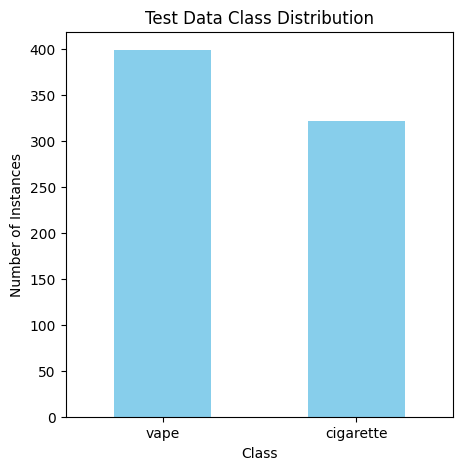

In [18]:
import matplotlib.pyplot as plt

# 클래스별 객체 수 시각화
def plot_class_distribution(class_counts):
    plt.figure(figsize=(5, 5))
    class_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Class')
    plt.xticks(rotation=0)
    plt.ylabel('Number of Instances')
    plt.title('Test Data Class Distribution')
    plt.show()

# 클래스별 객체 수 시각화
plot_class_distribution(class_counts)

In [19]:
# 그룹별로 묶어서 vape와 cigarette의 개수 세기
grouped = annotations_df.groupby('filename')['class'].value_counts().unstack(fill_value=0)
grouped.columns = ['ciga_count', 'vape_count']
grouped = grouped.reset_index()
grouped.head()

,filename,ciga_count,vape_count
0,#NAME?,7,55
1,-293_jpg.rf.7835341c19bb10fa65a347b67cf154d6.jpg,0,2
2,-331_jpg.rf.1e5d1838b5b6cab704282fa49d4b0b80.jpg,0,1
3,-349_jpg.rf.22753a58752aad5b745786a437433198.jpg,0,1
4,006_jpg.rf.07515f907223e6e4f3907d2446aa3739.jpg,1,0


In [20]:
# 클래스 조합별 개수 집계
grouped['class_combination'] = grouped.apply(lambda row: f"{row['ciga_count']}-{row['vape_count']}", axis=1)
class_combination_counts = grouped['class_combination'].value_counts().sort_index()

# 데이터프레임으로 변환
class_combination_counts_df = class_combination_counts.reset_index()
class_combination_counts_df.columns = ['Class Combination', 'Count']
class_combination_counts_df.sort_values(by='Count',ascending=False, inplace=True)
class_combination_counts_df

,Class Combination,Count
6,1-0,297
0,0-1,210
1,0-2,28
4,0-6,8
8,2-0,4
2,0-3,3
9,3-0,3
5,0-8,2
3,0-4,1
7,1-1,1


<Axes: xlabel='Class Combination'>

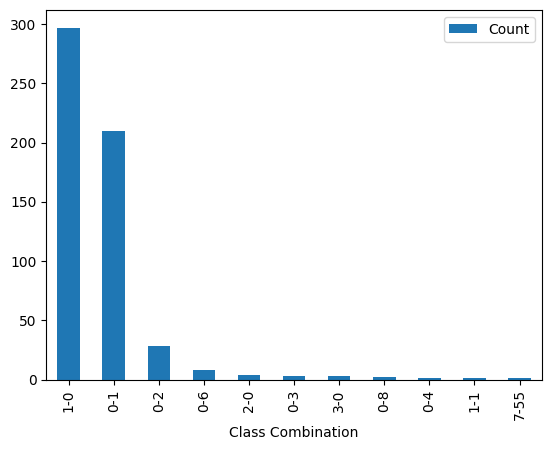

In [21]:
class_combination_counts_df.plot(x='Class Combination', y = 'Count', kind='bar')

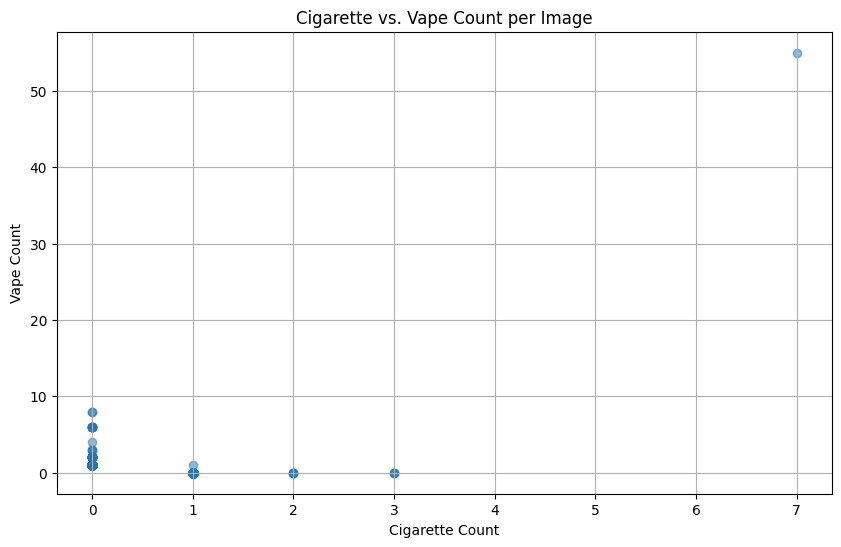

In [22]:
import matplotlib.pyplot as plt

# 시각화 함수 정의
def plot_ciga_vape_counts(grouped_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(grouped_df['ciga_count'], grouped_df['vape_count'], alpha=0.5)
    plt.xlabel('Cigarette Count')
    plt.ylabel('Vape Count')
    plt.title('Cigarette vs. Vape Count per Image')
    plt.grid(True)
    plt.show()

# 시각화 실행
plot_ciga_vape_counts(grouped)

<ipython-input-23-c70727abfd1c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_combination_counts_df, x='Class Combination', y='Count', palette='viridis')


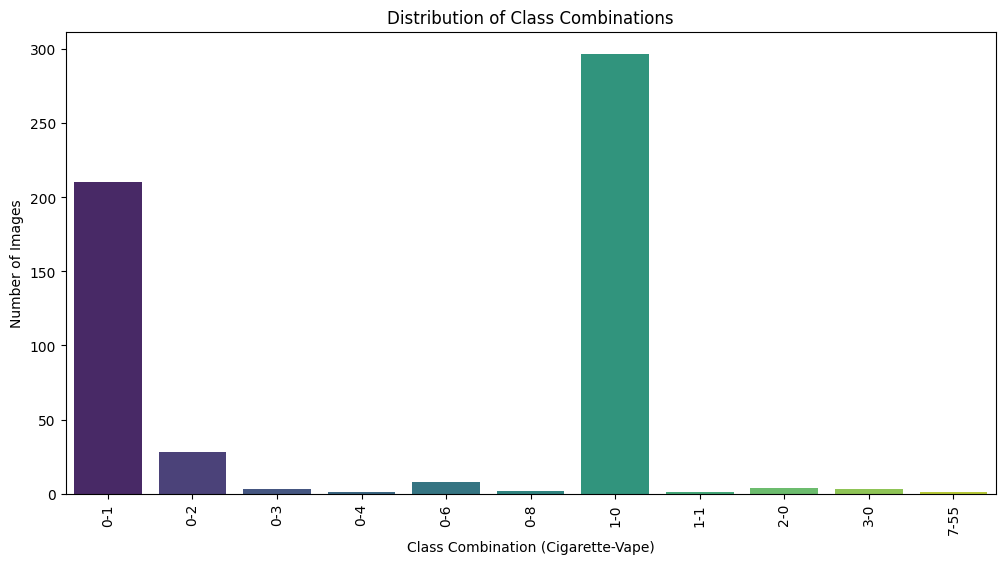

In [23]:
import seaborn as sns

# 두 클래스의 count를 함께 보는 시각화
def plot_class_combinations_distribution(grouped_df):
    # 클래스 조합별 개수 집계
    grouped_df['class_combination'] = grouped_df.apply(lambda row: f"{row['ciga_count']}-{row['vape_count']}", axis=1)
    class_combination_counts = grouped_df['class_combination'].value_counts().sort_index()

    # 데이터 준비
    class_combination_counts_df = class_combination_counts.reset_index()
    class_combination_counts_df.columns = ['Class Combination', 'Count']

    # 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(data=class_combination_counts_df, x='Class Combination', y='Count', palette='viridis')
    plt.xlabel('Class Combination (Cigarette-Vape)')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Class Combinations')
    plt.xticks(rotation=90)
    plt.show()

# 시각화 실행
plot_class_combinations_distribution(grouped)


# validation

In [24]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/Colab Notebooks/프로그래머스/3차프로젝트/yolov5/Cigarette-Vape-Detection-14/valid_annotations.csv'

# CSV 파일 읽기
annotations_df = pd.read_csv(file_path)

# 데이터 프레임 확인
annotations_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_6433_JPG_jpg.rf.0054452cfaa750c8e6758239ac...,640,640,vape,305,82,533,152
1,Screenshot-2024-04-03-184609_jpg.rf.00072ad4a6...,640,640,vape,100,280,189,515
2,812_jpg.rf.004dc7fe9c28a539164b11a7019b07ce.jpg,640,640,cigarette,224,265,249,298
3,smoking_c_0117_jpg.rf.00f69c9090993faa4bccc036...,640,640,cigarette,218,362,254,400
4,smoking_c_0117_jpg.rf.00f69c9090993faa4bccc036...,640,640,cigarette,428,341,451,378


In [25]:
# 클래스별 객체 수 집계
class_counts = annotations_df['class'].value_counts()
print(class_counts)

class
vape         722
cigarette    651
Name: count, dtype: int64


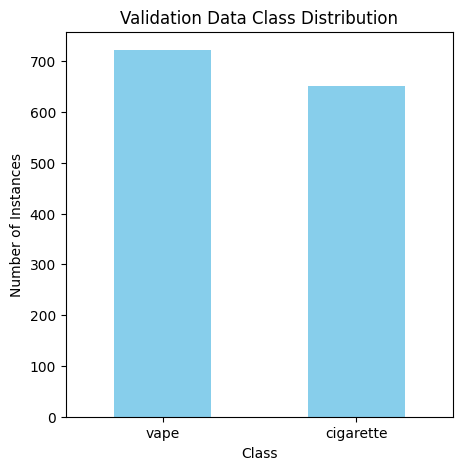

In [26]:
import matplotlib.pyplot as plt

# 클래스별 객체 수 시각화
def plot_class_distribution(class_counts):
    plt.figure(figsize=(5, 5))
    class_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Instances')
    plt.xticks(rotation=0)
    plt.title('Validation Data Class Distribution')
    plt.show()

# 클래스별 객체 수 시각화
plot_class_distribution(class_counts)

In [27]:
# 그룹별로 묶어서 vape와 cigarette의 개수 세기
grouped = annotations_df.groupby('filename')['class'].value_counts().unstack(fill_value=0)
grouped.columns = ['ciga_count', 'vape_count']
grouped = grouped.reset_index()
grouped.head()

,filename,ciga_count,vape_count
0,-10_jpg.rf.903489b1dbd30626717d7bca8f3c3eda.jpg,0,1
1,-110_jpg.rf.3a6d7f56e052ed013fdca10a27cfd2ab.jpg,0,1
2,-140_jpg.rf.dbaf5b32abef31b27892e24608f12995.jpg,0,1
3,-143_jpg.rf.7db0b8f5fa99cfdee2b58e48d4cc9f26.jpg,0,1
4,-207_jpg.rf.01d28efca9b68f90bfc0302811cc3844.jpg,0,1


In [28]:
# 클래스 조합별 개수 집계
grouped['class_combination'] = grouped.apply(lambda row: f"{row['ciga_count']}-{row['vape_count']}", axis=1)
class_combination_counts = grouped['class_combination'].value_counts().sort_index()

# 데이터프레임으로 변환
class_combination_counts_df = class_combination_counts.reset_index()
class_combination_counts_df.columns = ['Class Combination', 'Count']
class_combination_counts_df.sort_values(by='Count',ascending=False, inplace=True)
class_combination_counts_df

,Class Combination,Count
11,1-0,590
0,0-1,478
4,0-2,37
13,2-0,21
7,0-5,6
5,0-3,6
8,0-6,4
10,0-8,3
14,3-0,3
6,0-4,2


<Axes: xlabel='Class Combination'>

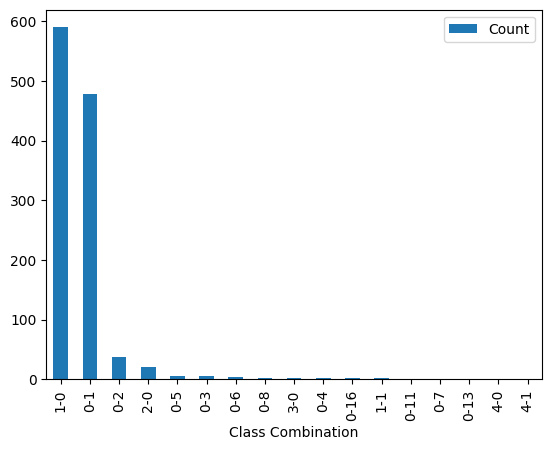

In [29]:
class_combination_counts_df.plot(x='Class Combination', y = 'Count', kind='bar')

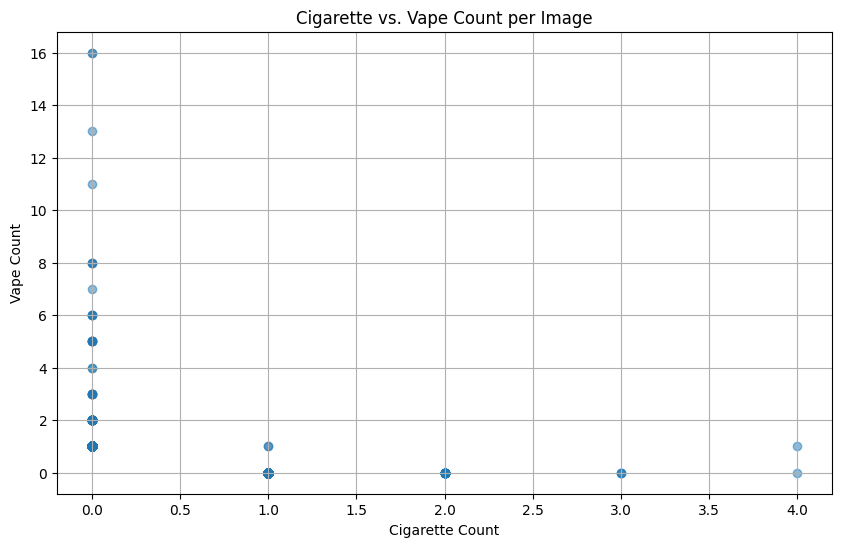

In [30]:
import matplotlib.pyplot as plt

# 시각화 함수 정의
def plot_ciga_vape_counts(grouped_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(grouped_df['ciga_count'], grouped_df['vape_count'], alpha=0.5)
    plt.xlabel('Cigarette Count')
    plt.ylabel('Vape Count')
    plt.title('Cigarette vs. Vape Count per Image')
    plt.grid(True)
    plt.show()

# 시각화 실행
plot_ciga_vape_counts(grouped)

<ipython-input-31-c70727abfd1c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_combination_counts_df, x='Class Combination', y='Count', palette='viridis')


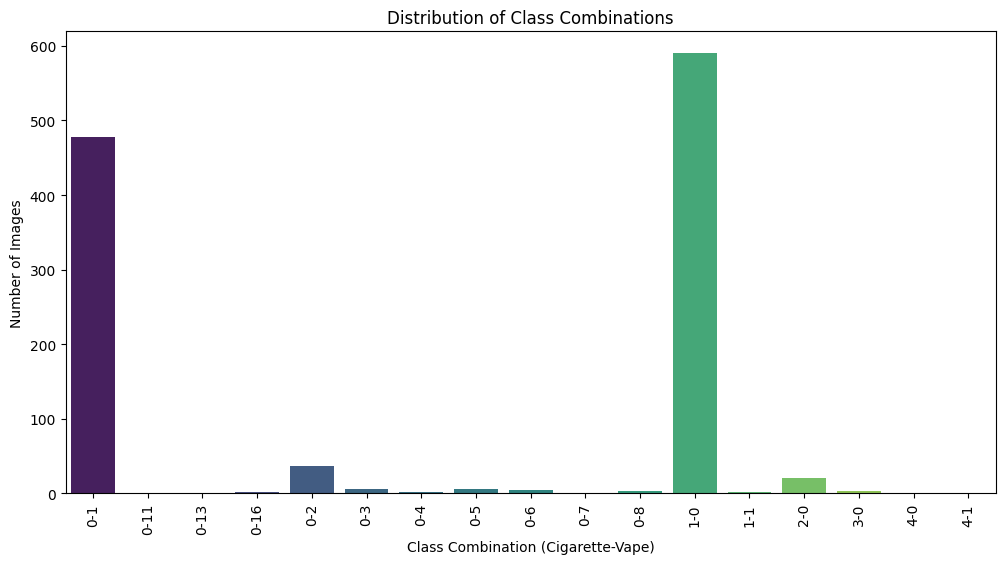

In [31]:
import seaborn as sns

# 두 클래스의 count를 함께 보는 시각화
def plot_class_combinations_distribution(grouped_df):
    # 클래스 조합별 개수 집계
    grouped_df['class_combination'] = grouped_df.apply(lambda row: f"{row['ciga_count']}-{row['vape_count']}", axis=1)
    class_combination_counts = grouped_df['class_combination'].value_counts().sort_index()

    # 데이터 준비
    class_combination_counts_df = class_combination_counts.reset_index()
    class_combination_counts_df.columns = ['Class Combination', 'Count']

    # 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(data=class_combination_counts_df, x='Class Combination', y='Count', palette='viridis')
    plt.xlabel('Class Combination (Cigarette-Vape)')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Class Combinations')
    plt.xticks(rotation=90)
    plt.show()

# 시각화 실행
plot_class_combinations_distribution(grouped)
